In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import matplotlib.pyplot as plt
import swan_vis as swan
import yaml
from snakemake.io import expand

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [2]:
config_file = '../snakemake/config.yml'
with open(config_file) as f:
    config = yaml.safe_load(f)

In [3]:
ab = '../'+expand(config['data']['ab'], species='human')[0]
filt_ab = '../'+expand(config['data']['filt_ab'], species='human')[0]
read_annot = '../'+expand(config['data']['read_annot'], species='human')[0]
t_metadata = '../'+expand(config['ref']['cerberus']['t_info'], species='human')[0]
lib_meta = '../'+expand(config['data']['meta'], species='human')[0]
swan_file = '../'+expand(config['data']['sg'], species='human')[0]
cerberus_h5 = '../'+expand(config['data']['cerb_annot'], species='human')[0]
cerb_t_metadata = '../'+expand(config['data']['t_info'], species='human')[0]
major_isos = '../'+expand(config['data']['major_isos'], species='human', obs_col='sample')[0]
pi_tpm_table = '../'+expand(config['data']['pi_tpm']['triplet'], species='human', obs_col='sample')[0]
pp_summary = '../'+expand(config['data']['p_pred']['summary'], species='human')[0]
ref_t_metadata = '../'+expand(config['ref']['t_info'], species='human')[0]
ref_g_metadata = '../'+expand(config['ref']['g_info'], species='human')[0]


ver = 'v40_cerberus'
min_tpm = 1
gene_subset = 'polya'
obs_col = 'sample'
go_gene_subset = 'protein_coding'
predom_iso_subset = 'protein_coding'

m_lib_meta = '../'+expand(config['data']['meta'], species='mouse')[0]

# Figure 2

## Novelty and support of detected triplet features

tss
Calculating tss TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/utils.py:2038: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/utils.py:2037: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # tsss detected: 76487
# tsss >= 1 tpm: 67730
Applying gene type and novelty subset
Number of tsss reported: 64664
153941
64664
     support  counts
0      Known   53018
1      Novel    6667
2  Supported    4979
18.01% (11646/64664) of tsss are novel
42.75% (4979/11646) of novel tsss are supported


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/plotting.py:4012: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)



ic
Calculating ic TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/utils.py:2038: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/utils.py:2037: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # ics detected: 149009
# ics >= 1 tpm: 135190
Applying gene type and novelty subset
Number of ics reported: 132071
356048
132071
     support  counts
0      Known   82760
1      Novel   40500
2  Supported    8811
37.34% (49311/132071) of ics are novel
17.87% (8811/49311) of novel ics are supported


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/plotting.py:4012: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)



tes
Calculating tes TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/utils.py:2038: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/utils.py:2037: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # tess detected: 87670
# tess >= 1 tpm: 77369
Applying gene type and novelty subset
Number of tess reported: 74318
186735
74318
     support  counts
0      Known   57878
1      Novel    3451
2  Supported   12989
22.12% (16440/74318) of tess are novel
79.01% (12989/16440) of novel tess are supported


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/plotting.py:4012: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


<Figure size 216x1440 with 0 Axes>

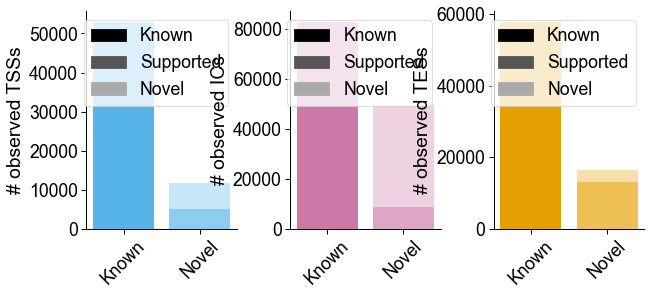

In [5]:
plot_novel_supported_triplet_feats(filt_ab,
                                   cerberus_h5,
                                   gene_subset,
                                   min_tpm,
                                   'figures/triplet_feature_novelty_support.pdf')

## Number of detected triplet features per gene

Calculating tss TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/utils.py:2038: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/utils.py:2037: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # tsss detected: 76487
# tsss >= 1 tpm: 67730
Applying gene type and novelty subset
Number of tsss reported: 64664
Calculating ic TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/utils.py:2038: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/utils.py:2037: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # ics detected: 149009
# ics >= 1 tpm: 135190
Applying gene type and novelty subset
Number of ics reported: 132071
Calculating tes TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/utils.py:2038: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/utils.py:2037: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # tess detected: 87670
# tess >= 1 tpm: 77369
Applying gene type and novelty subset
Number of tess reported: 74318


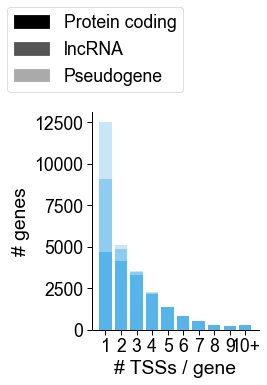

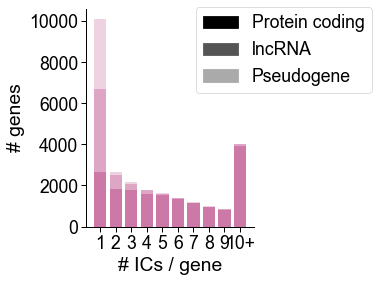

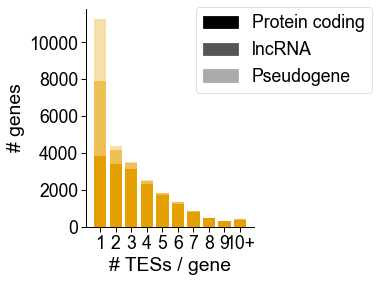

In [6]:
dfs = plot_triplet_feats_per_gene(cerberus_h5,
                                filt_ab,
                                gene_subset,
                                min_tpm,
                                opref='figures/triplet_feat_per_gene_')

In [8]:
# what percentage of polya genes have more than one triplet feature / gene? 
for feat in ['tss', 'ic', 'tes']:
    df = dfs[feat]
    df['total'] = df[['lncRNA', 'protein_coding', 'pseudogene']].sum(axis=1)
    col = f'n_{feat}'
    print(col)
    df['one_feat'] = (df[col] == '1')
    temp = df[['total', 'one_feat']].groupby('one_feat').sum().reset_index()
    
    n = temp.total.sum(axis=0)
    n_num = temp.loc[temp.one_feat==False, 'total'].values[0]
    print(f'{(n_num/n)*100:.2f}% ({n_num}/{n}) of polyA genes have >1 {feat}')

n_tss
53.42% (14311.0/26792.0) of polyA genes have >1 tss
n_ic
62.32% (16691/26782) of polyA genes have >1 ic
n_tes
58.00% (15536/26788) of polyA genes have >1 tes


## Detection of transcripts with known ICs by biotype


Calculating iso TPM values
Getting ['Known'] ics
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/utils.py:2038: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/utils.py:2037: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # isos detected: 231136
# isos >= 1 tpm: 210239
Applying gene type and novelty subset
Number of isos reported: 130337
Detected 130337 transcripts >= 1 TPM w/ a known ic


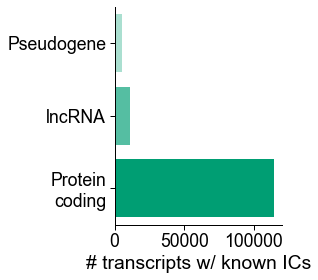

In [9]:
plot_transcript_det_by_biotype(filt_ab,
                               cerberus_h5,
                               min_tpm, 
                               gene_subset, 
                               ['Known'],
                               'figures/transcript_det_by_biotype.pdf')

## Transcript detection by novelty of each triplet feature

Calculating iso TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/utils.py:2038: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/utils.py:2037: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # isos detected: 231136
# isos >= 1 tpm: 210239
Applying gene type and novelty subset
Number of isos reported: 206806
51.96% (107455/206806) transcripts have all known triplet features


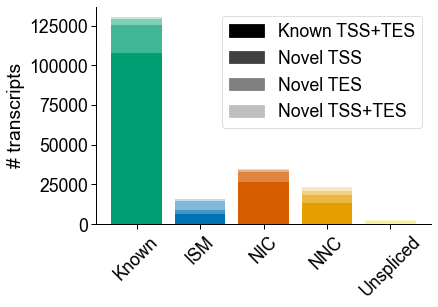

In [12]:
df = plot_transcripts_by_triplet_feat_novelty(filt_ab,
                                         cerberus_h5,
                                         min_tpm, 
                                         gene_subset,
                                         'figures/transcripts_by_triplet_feature_novelty.pdf')

## # Isoforms detected per gene by biotype

Calculating iso TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/utils.py:2038: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/utils.py:2037: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # isos detected: 231136
# isos >= 1 tpm: 210239
Applying gene type and novelty subset
Number of isos reported: 206806
figures//isos_per_gene_support.png


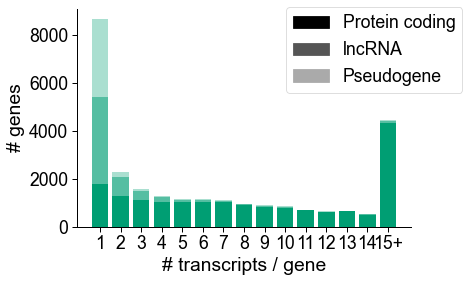

In [11]:
df = pd.read_csv(filt_ab, sep='\t')
_, ids = get_tpm_table(df,
               how='iso',
               min_tpm=min_tpm,
               gene_subset=gene_subset)
df = plot_n_isos_per_gene(df,
                     show_pc=True,
                     subset=ids,
                     max_isos=15, opref='figures/')

In [12]:
# what percentage of polya genes have more than one transcript feature / gene? 
df['total'] = df[['lncRNA', 'protein_coding', 'pseudogene']].sum(axis=1)
df['one_feat'] = (df['n_iso'] == '1')
temp = df[['total', 'one_feat']].groupby('one_feat').sum().reset_index()

n = temp.total.sum(axis=0)
n_num = temp.loc[temp.one_feat==False, 'total'].values[0]
print(f'{(n_num/n)*100:.2f}% ({n_num}/{n}) of polyA genes have >1 transcript')

67.70% (18131/26781) of polyA genes have >1 transcript


## Browser plots for genes expressed > 500 TPM

Read in graph from ../data/human/swan_graph.p
Calculating iso TPM values
Subsetting for polya genes
Enforcing minimum TPM
Total # isos detected: 231136
# isos >= 1 tpm: 210239
Applying gene type and novelty subset
Number of isos reported: 206806
Found 50 total samples
135.55278425418857


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/plotting.py:6074: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


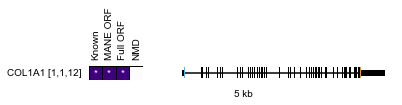

In [5]:
_ = plot_browser_isos_2(cerberus_h5,
                        swan_file,
                        filt_ab,
                        pp_summary,
                        major_isos,
                        'COL1A1',
                        obs_col,
                        'ovary',
                        'figures/col1a1_ovary_browser_isos.pdf')

Read in graph from ../data/human/swan_graph.p
Calculating iso TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/utils.py:2069: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/utils.py:2068: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # isos detected: 231136
# isos >= 1 tpm: 210239
Applying gene type and novelty subset
Number of isos reported: 206806
Found 50 total samples
76.01094557616297


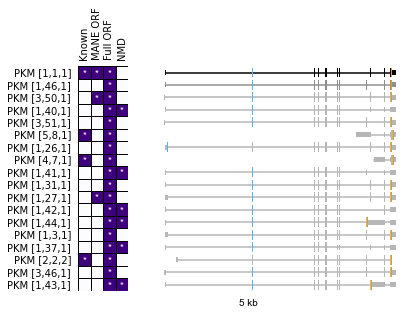

In [4]:
_ = plot_browser_isos_2(cerberus_h5,
                        swan_file,
                        filt_ab,
                        pp_summary,
                        major_isos,
                        'PKM',
                        obs_col,
                        'ovary',
                        'figures/pkm_ovary_browser_isos.pdf')

low pi and low tpm
6.64% (866/13041) of protein coding genes in ovary have pi < 50 and tpm < 20

low pi and high tpm
2.20% (287/13041) of protein coding genes in ovary have pi < 50 and tpm > 100

high pi and low tpm
21.88% (2854/13041) of protein coding genes in ovary have pi > 90 and tpm < 20

high pi and high tpm
3.03% (395/13041) of protein coding genes in ovary have pi > 90 and tpm > 100



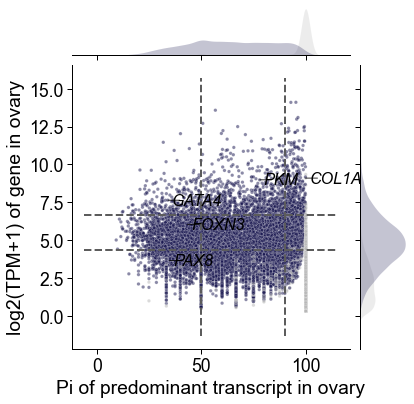

In [6]:
plot_gene_tpm_v_predom_t_pi(cerberus_h5,
                                major_isos,
                                'sample_det',
                                obs_col,
                                'ovary',
                                gene_subset,
                                'figures/ovary_predom_t_pi_vs_gene_tpm.pdf',
                                label_genes=['PKM', 'COL1A1', 'FOXN3', 'GATA4', 'PAX8'])

## # predominant isoforms / gene

Calculating iso TPM values
Subsetting for protein_coding genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/utils.py:2069: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/utils.py:2068: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # isos detected: 231136
# isos >= 1 tpm: 210239
Applying gene type and novelty subset
Number of isos reported: 187945
Found 50 total samples
697385
545189
Median predominant transcripts / gene: 2.0
17523
12794
12794/17523 73.01% protein-coding genes have >1 predominant isoforms across samples


<Figure size 216x360 with 0 Axes>

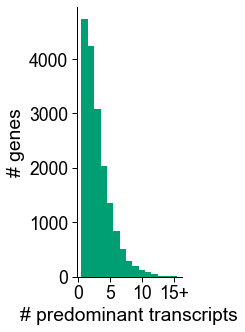

In [3]:
fname = 'figures/predom_isos_per_gene.pdf'
df = plot_n_predom_transcripts(pi_tpm_table,
                          filt_ab,
                          ver,
                          predom_iso_subset,
                          min_tpm,
                          fname,
                          max_isos=15,
                          figsize=(3,5))

## Number of isoforms detected

In [4]:
df = pd.read_csv(filt_ab, sep='\t')
df, tids = get_tpm_table(df,
               how='iso',
               min_tpm=min_tpm,
               gene_subset=gene_subset)

Calculating iso TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/utils.py:2069: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/utils.py:2068: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # isos detected: 231136
# isos >= 1 tpm: 210239
Applying gene type and novelty subset
Number of isos reported: 206806


In [16]:
print(f'Number of {gene_subset} isoforms detected >= {min_tpm} in >= 1 library: {len(tids)}')

Number of polya isoforms detected >= 1 in >= 1 library: 206806


## Number of isoforms with novel ICs detected

In [5]:
df = df.reset_index()
feat = 'ic'
df = add_feat(df, col='annot_transcript_id', kind=feat)
feat_df = get_ca_table(cerberus_h5, feat)
feat_df = feat_df[['Name', 'novelty']]
feat_df.rename({'novelty': '{}_novelty'.format(feat),
                'Name': feat}, axis=1, inplace=True)
df = df.merge(feat_df, how='left', on=feat)

In [18]:
df = df[['annot_transcript_id', 'ic_novelty']].groupby(['ic_novelty']).count().reset_index()
n_novel = df.loc[df.ic_novelty!='Known'].sum().loc['annot_transcript_id']

In [19]:
novel_tids = [t for t in tids if 'ENCODE' in t]
print(f'Number of {gene_subset} isoforms with novel ICs detected >= {min_tpm} in >= 1 library: {n_novel}')

Number of polya isoforms with novel ICs detected >= 1 in >= 1 library: 76469


In [10]:
# n = len(df.loc[df.ic_novelty!='Known', 'ic'].unique().tolist())
# print(f'Number of novel ICs detected >= {min_tpm} in >= 1 library: {n}')        

## % of genes w/ more than one isoform detected

In [20]:
df = pd.read_csv(filt_ab, sep='\t')
df = get_det_table(df,
               how='iso',
               min_tpm=min_tpm,
               gene_subset=gene_subset)
df = df.transpose()
df = df.reset_index()
df = df[['annot_transcript_id']]
df['gid'] = df.annot_transcript_id.str.split('[', expand=True)[0]
gene_df, _, _ = get_gtf_info(how='gene', ver='v40_cerberus')
gene_df['gid_stable'] = cerberus.get_stable_gid(gene_df, 'gid')
print(len(df.index))
df = df.merge(gene_df, how='left',left_on='gid', right_on='gid_stable')
print(len(df.index))
temp1 = df[['annot_transcript_id', 'gid_stable', 'biotype_category']].groupby(['gid_stable', 'biotype_category']).nunique().reset_index()
temp1.rename({'annot_transcript_id': 'n_isos'}, axis=1, inplace=True)
temp1['one_iso'] = temp1.n_isos == 1
temp1 = temp1[['biotype_category', 'one_iso', 'gid_stable']].groupby(['one_iso', 'biotype_category']).nunique().reset_index()
temp1.rename({'gid_stable':'n_genes'}, axis=1, inplace=True)
temp2 = df[['gid_stable', 'biotype_category']].groupby(['biotype_category']).nunique().reset_index()
temp2.rename({'gid_stable': 'n_genes'}, axis=1, inplace=True)
temp1 = temp1.merge(temp2, how='left', on='biotype_category', suffixes=('', '_total'))
temp1['perc'] = (temp1.n_genes/temp1.n_genes_total)*100
temp1

Calculating iso TPM values
Subsetting for polya genes
Enforcing minimum TPM
Total # isos detected: 231136
# isos >= 1 tpm: 210239
Applying gene type and novelty subset
Number of isos reported: 206806
Found 138 total libraries
206806
206806


,one_iso,biotype_category,n_genes,n_genes_total,perc
0,False,lncRNA,1853,5483,33.795367
1,False,protein_coding,15734,17523,89.790561
2,False,pseudogene,544,3775,14.410596
3,True,lncRNA,3630,5483,66.204633
4,True,protein_coding,1789,17523,10.209439
5,True,pseudogene,3231,3775,85.589404


## Length of COL1A1 transcript

In [27]:
temp2 = pd.read_csv(cerb_t_metadata, sep='\t')
temp2.loc[temp2.gname=='COL1A1']

,tid,t_len,gid,gname,biotype,biotype_category,MANE_Select,MANE_Plus_Clinical,tf
48244,"ENSG00000108821[1,1,12]",6878,ENSG00000108821.13,COL1A1,protein_coding,protein_coding,False,False,False
48245,"ENSG00000108821[1,1,13]",5494,ENSG00000108821.13,COL1A1,protein_coding,protein_coding,False,False,False
48246,"ENSG00000108821[1,1,14]",4929,ENSG00000108821.13,COL1A1,protein_coding,protein_coding,False,False,False
48247,"ENSG00000108821[1,1,1]",6066,ENSG00000108821.13,COL1A1,protein_coding,protein_coding,False,False,False
48248,"ENSG00000108821[1,15,14]",5057,ENSG00000108821.13,COL1A1,protein_coding,protein_coding,False,False,False
48249,"ENSG00000108821[13,14,1]",1194,ENSG00000108821.13,COL1A1,protein_coding,protein_coding,False,False,False
48250,"ENSG00000108821[2,2,2]",1249,ENSG00000108821.13,COL1A1,protein_coding,protein_coding,False,False,False
48251,"ENSG00000108821[7,7,6]",709,ENSG00000108821.13,COL1A1,protein_coding,protein_coding,False,False,False
48252,"ENSG00000108821[8,8,8]",717,ENSG00000108821.13,COL1A1,protein_coding,protein_coding,False,False,False


## Expression levels of PKM and COL1A1 genes in ovary


In [22]:
df = pd.read_csv(ab, sep='\t')
df, gids = get_tpm_table(df,
               how='gene',
               min_tpm=min_tpm,
               gene_subset=gene_subset, 
               groupby='sample')

Calculating gene TPM values
Subsetting for novelty categories ['Known']
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/utils.py:2038: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/utils.py:2037: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # genes detected: 599976
# genes >= 1 tpm: 292060
Applying gene type and novelty subset
Averaging over biosample
Found 50 total samples
Number of genes reported: 33772


In [23]:
df.loc[['ENSG00000108821', 'ENSG00000067225'], 'ovary']

ENSG00000108821    547.942799
ENSG00000067225    505.928192
Name: ovary, dtype: float64

## # exons in PKM and COL1A1

In [28]:
gnames = ['PKM', 'COL1A1']
sg = swan.read(swan_file)

# get list of all the transcripts expressed
df = pd.read_csv(filt_ab, sep='\t')
df, tids = get_tpm_table(df,
               how='iso',
               min_tpm=min_tpm,
               gene_subset=gene_subset, 
               groupby=obs_col)

# get just the transcripts that are from the genes we care about
t_df = sg.t_df.loc[sg.t_df.gname.isin(gnames)].copy(deep=True)

# just get the expressed transcripts
t_df = t_df.loc[t_df.tid.isin(tids)]

# string representation of exons
t_df['temp_path'] = t_df.path.str.join('-')
t_df[['temp_path', 'path']].head()

# get unique edges / gene
e_df = swan.pivot_path_list(t_df, 'path')
e_df = e_df.merge(t_df[['gname']], left_index=True, right_index=True)
e_df.reset_index(drop=True, inplace=True)
e_df = e_df.drop_duplicates()

# only exons
e_df = e_df.merge(sg.edge_df[['edge_type']], left_on='edge_id', right_index=True)
e_df = e_df.loc[e_df.edge_type=='exon']

for g in gnames:
    temp = e_df.loc[e_df.gname==g]
    n = len(temp.edge_id.unique().tolist())
    print(f'{n} unique exons are in {g}')

Read in graph from ../data/human/swan_graph.p
Calculating iso TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/utils.py:2038: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/utils.py:2037: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # isos detected: 231136
# isos >= 1 tpm: 210239
Applying gene type and novelty subset
Averaging over biosample
Found 50 total samples
Number of isos reported: 206806
47 unique exons are in PKM
60 unique exons are in COL1A1


# Figure S5

## Upset plots for detected triplet features

Calculating tss TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/utils.py:2038: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/utils.py:2037: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # tsss detected: 76487
# tsss >= 1 tpm: 67730
Applying gene type and novelty subset
Number of tsss reported: 64664
Calculating ic TPM values
Subsetting for polya genes
Enforcing minimum TPM
Total # ics detected: 149009
# ics >= 1 tpm: 135190
Applying gene type and novelty subset
Number of ics reported: 132071
Calculating tes TPM values
Subsetting for polya genes
Enforcing minimum TPM
Total # tess detected: 87670
# tess >= 1 tpm: 77369
Applying gene type and novelty subset
Number of tess reported: 74318


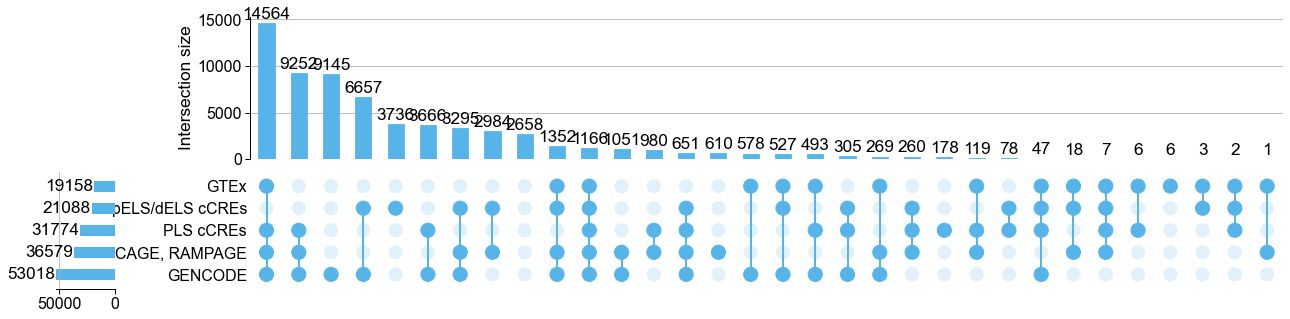

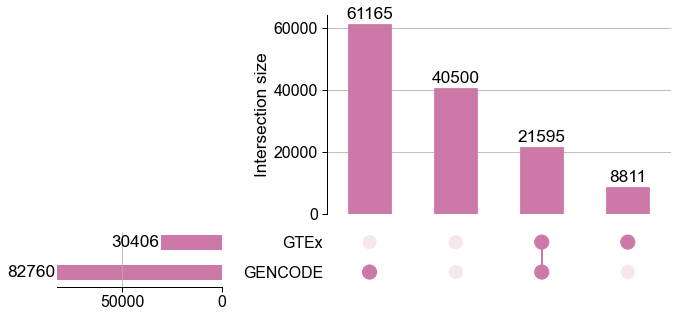

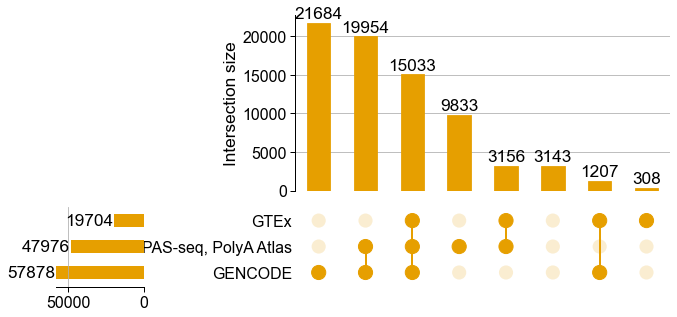

In [8]:
for feat in ['tss', 'ic', 'tes']:
    fname = f'figures/{feat}_upset.pdf'
    make_triplet_feat_upset(cerberus_h5,
                            filt_ab,
                            feat,
                            gene_subset,
                            min_tpm,
                            fname)

## Lengths of TSSs and TESs

Calculating tss TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/utils.py:2038: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/utils.py:2037: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # tsss detected: 76487
# tsss >= 1 tpm: 67730
Applying gene type and novelty subset
Number of tsss reported: 64664
101
99.79% of regions (64525/64664) are b/w 0 and 500 bp long
4.83% of regions (3122/64664) are b/w 250 and 1264 bp long
Calculating tes TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/utils.py:2038: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/utils.py:2037: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # tess detected: 87670
# tess >= 1 tpm: 77369
Applying gene type and novelty subset
Number of tess reported: 74318
101
99.80% of regions (74168/74318) are b/w 0 and 500 bp long
3.36% of regions (2497/74318) are b/w 250 and 1036 bp long


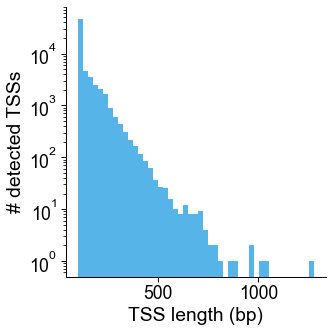

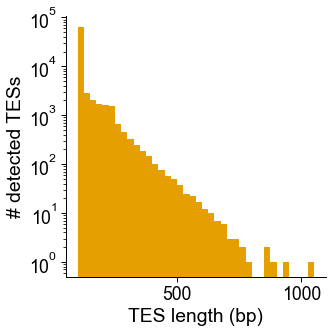

In [7]:
df = plot_feat_len_hist(cerberus_h5,
                   filt_ab,
                   'tss',
                   gene_subset,
                   min_tpm,
                   'figures/tss_len_hist.pdf')

df = plot_feat_len_hist(cerberus_h5,
                   filt_ab,
                   'tes',
                   gene_subset,
                   min_tpm,
                   'figures/tes_len_hist.pdf')

## Intron chains by novelty type


Calculating ic TPM values
Subsetting for polya genes
Enforcing minimum TPM
Total # ics detected: 149009
# ics >= 1 tpm: 135190
Applying gene type and novelty subset
Number of ics reported: 132071
     novelty  counts
0        ISM   11184
1      Known   82760
2        NIC   21287
3        NNC   15381
4  Unspliced    1459
Number of complete intron chains: counts    132071
dtype: int64


<Figure size 216x288 with 0 Axes>

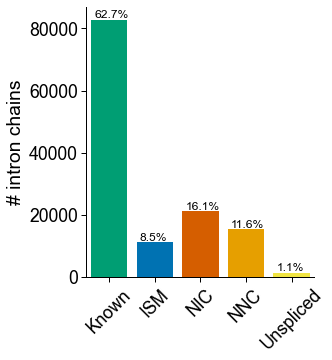

<Figure size 432x288 with 0 Axes>

In [9]:
df = pd.read_csv(filt_ab, sep='\t')
df, ic_ids = get_tpm_table(df,
               how='ic',
               gene_subset=gene_subset,
               min_tpm=min_tpm)
plot_ic_novelty(cerberus_h5, 
                source='lapa', 
                oprefix='figures/human',
                pass_list=ic_ids)

# Figure S6

## Transcript detection (known ICs) by sample

Calculating iso TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/utils.py:2038: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/utils.py:2037: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # isos detected: 231136
# isos >= 1 tpm: 210239
Applying gene type and novelty subset
Number of isos reported: 206806
Found 50 total samples
120329 / 206806 (58.2%) transcripts are expressed in <= 8 samples
28310 / 206806 (13.7%) transcripts are expressed in >= 30 samples
101077 / 206806 (48.9%) transcripts are expressed in <= 10% samples
9124 / 206806 (4.4%) transcripts are expressed in >= 90% samples


<Figure size 360x432 with 0 Axes>

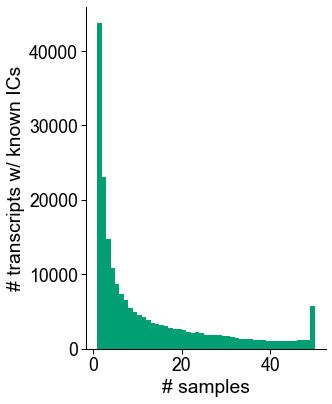

In [10]:
df = pd.read_csv(filt_ab, sep='\t')
df = plot_biosamp_det(df,
                      figsize=(5,6),
                      how='iso',
                      min_tpm=min_tpm,
                      gene_subset=gene_subset,
                      sample=None,
                      groupby=obs_col,
                      ic_nov=['Known'],
                      opref='figures/transcript')

specific_thresh = 8
ubiq_thresh = 30

n_iso = len(df.index)
n_specific = len(df.loc[df.n_samples <= specific_thresh].index)
n_ubiq = len(df.loc[df.n_samples >= ubiq_thresh].index)

print('{} / {} ({:.1f}%) transcripts are expressed in <= {} samples'.format(n_specific, n_iso, (n_specific/n_iso)*100, specific_thresh))
print('{} / {} ({:.1f}%) transcripts are expressed in >= {} samples'.format(n_ubiq, n_iso, (n_ubiq/n_iso)*100, ubiq_thresh))

specific_thresh = 10
ubiq_thresh = 90

n_samples = len(df.columns)
df['perc'] = (df.n_samples/n_samples)*100

n_iso = len(df.index)
n_specific = len(df.loc[df.perc < specific_thresh].index)
n_ubiq = len(df.loc[df.perc > ubiq_thresh].index)

print('{} / {} ({:.1f}%) transcripts are expressed in <= {}% samples'.format(n_specific, n_iso, (n_specific/n_iso)*100, specific_thresh))
print('{} / {} ({:.1f}%) transcripts are expressed in >= {}% samples'.format(n_ubiq, n_iso, (n_ubiq/n_iso)*100, ubiq_thresh))


## Number of isoforms per gene at different biotypes and TPM bins

[(10.0, 100.0], (100.0, 87160.203], (1.0, 10.0], NaN]
Categories (3, interval[float64, right]): [(1.0, 10.0] < (10.0, 100.0] < (100.0, 87160.203]]


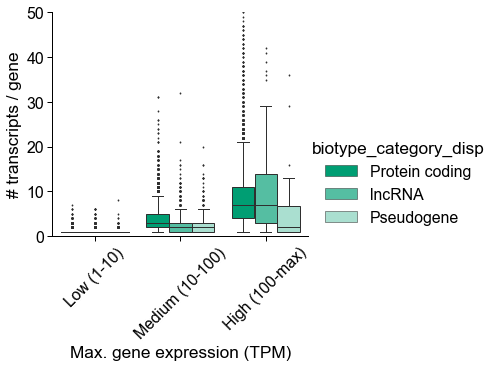

In [11]:
df = plot_exp_v_iso_biotype_boxplot(cerberus_h5,
                                    ver,
                                    'figures/exp_v_iso_biotype_box.pdf')

In [12]:
# get median of each biotype category in highest tpm bin
for b in df.biotype_category.unique():
    m = df.loc[(df.tpm_bin.str.contains('High'))&\
               (df.biotype_category==b)].n_iso.median()
    print(f'Median # isoforms for high tpm {b} genes is {m}')

Median # isoforms for high tpm protein_coding genes is 7.0
Median # isoforms for high tpm lncRNA genes is 7.0
Median # isoforms for high tpm pseudogene genes is 2.0


## # TSSs or TESs detected per IC

Calculating iso TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/utils.py:2038: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/utils.py:2037: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # isos detected: 231136
# isos >= 1 tpm: 210239
Applying gene type and novelty subset
Number of isos reported: 206806
88.34% (109320/123752 of unique ics have 1 tss


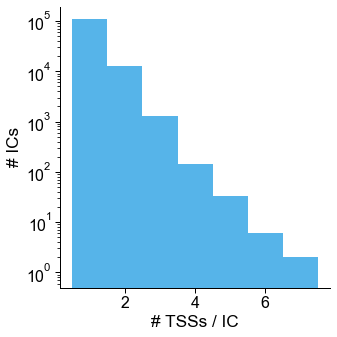

In [11]:
# tss / ic in detected transcripts
ca = cerberus.read(cerberus_h5)
df = pd.read_csv(filt_ab, sep='\t')
df, tids = get_tpm_table(df,
               how='iso',
               min_tpm=min_tpm,
               gene_subset=gene_subset,
               h5=cerberus_h5)
feat = 'tss'
fname = 'figures/tss_per_ic.pdf'

temp = plot_ends_per_ic(df, ca, feat,
                       fname,
                       rm_monoexonic=True)

Calculating iso TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/utils.py:2038: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/utils.py:2037: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # isos detected: 231136
# isos >= 1 tpm: 210239
Applying gene type and novelty subset
Number of isos reported: 206806
71.08% (87965/123752 of unique ics have 1 tes


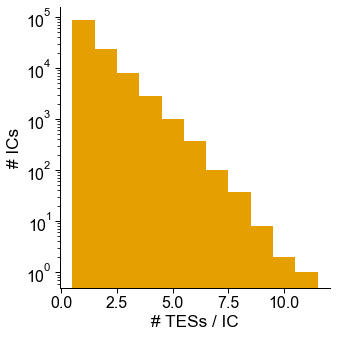

In [12]:
# tes / ic in detected transcripts
df = pd.read_csv(filt_ab, sep='\t')
df, tids = get_tpm_table(df,
               how='iso',
               min_tpm=min_tpm,
               gene_subset=gene_subset,
               h5=cerberus_h5)
feat = 'tes'
fname = 'figures/tes_per_ic.pdf'

temp = plot_ends_per_ic(df, ca, feat,
                       fname,
                       rm_monoexonic=True)

99.72% (216350/216960 of unique ics have 1 tss


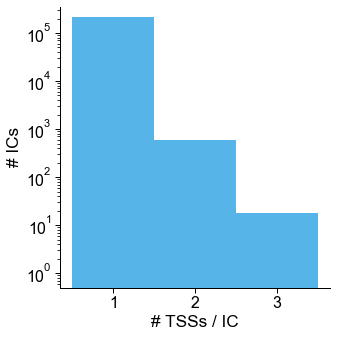

In [13]:
# gencode v40 tss / ic
df = pd.read_csv(t_metadata, sep='\t')

# only polya
polya_cats = ['protein_coding', 'lncRNA', 'pseudogene']
df = df.loc[df.biotype_category.isin(polya_cats)]
df.set_index('tid', inplace=True)

feat = 'tss'
fname = 'figures/v40_tss_per_ic.pdf'

temp = plot_ends_per_ic(df, ca, feat,
                       fname,
                       rm_monoexonic=True)

99.42% (215692/216960 of unique ics have 1 tes


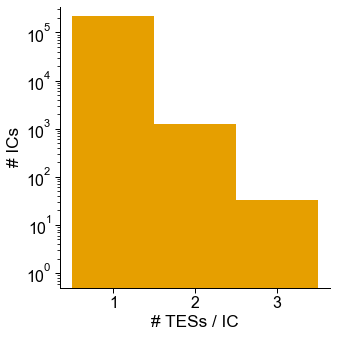

In [14]:
# gencode v40 tes / ic
df = pd.read_csv(t_metadata, sep='\t')

# only polya
polya_cats = ['protein_coding', 'lncRNA', 'pseudogene']
df = df.loc[df.biotype_category.isin(polya_cats)]
df.set_index('tid', inplace=True)

feat = 'tes'
fname = 'figures/v40_tes_per_ic.pdf'

temp = plot_ends_per_ic(df, ca, feat,
                       fname,
                       rm_monoexonic=True)